# Objectives
---
Here, our objective is to predict the probability of default risks for each client by using their personal information . For credit companies, to predict the risk of new client being in default is essential to increase the profitability.

# Dataset

Credit card default dataset <br>
In the first dataset, personal attribute information of each client is included. In the second dataset, default status of each client is recorded. By combining these information with the given IDs, we can identify the relation between personal attributes and default risks. <br>

Reference: https://www.kaggle.com/rikdifos/credit-card-approval-prediction <br><br>


**Dataset 1**

Overview of Dataset　<br>
- Unit of data: Each client
- Range of data: Unknown but no problem

Variables
- `ID`: Client ID	
- `CODE_GENDER`: Gender (F=Female. M=Male)
- `FLAGOWNCAR`: Whether to have a car or not (Y=Yes, N=No)
- `FLAGOWNREALTY`: Whether to have a property (Y=Yes, N=No)
- `CNT_CHILDREN`: Number of children
- `AMTINCOMETOTAL`: Yearly income (USD)
- `NAMEINCOMETYPE`: Category in income type (Working, commercial associate, etc...)
- `NAMEEDUCATIONTYPE`: Education level (Secondary / secondary special, Higher education, etc...)
- `NAMEFAMILYSTATUS`: Marital status (married, Single/not married)
- `NAMEHOUSINGTYPE`: Way of living (House / apartment, With parents, etc...)
- `DAYS_BIRTH`: Birthday (the days since BD)
- `DAYS_EMPLOYED`: Start date of employment (The days since starting to work)
- `FLAG_MOBIL`: Whether to have a mobile phone (Y=Yes, N=No)
- `FLAGWORKPHONE`: Whether to have a work phone (Y=Yes, N=No)
- `FLAG_PHONE`: Whether to have a phone（1=Yes, 0=No)
- `FLAG_EMAIL`: Whether to have an email (1=Yes, 0=No)	
- `OCCUPATION_TYPE`: Occupation type (accountants, etc...)
- `CNTFAMMEMBERS`: family size (Number of each family)


**Dataset 2**

Overview of dataset　<br>
- Unit of data: Each record
- Range of data: Unknown but no problem

variables
- `ID`: Client ID
- `MONTHS_BALANCE`: Record month (Current month=0, Previous month=-1, month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on)
- `STATUS`: Default status (0=1-29 days past due, 1=30-59 days past due, 2=60-89 days overdue, 3=90-119 days overdue, 4=120-149 days overdue, 5=Overdue or bad debts, write-offs for more than 150 days, C=paid off that month, X=No loan for the month)

# Stragegy
---

 - Objectives: To predict the probability of default risk for each client
 - Dependent variables: `target` (generated from the variable `STATUS`)
 - Independent variables: variables from Dataset 1
 - Classification models: Random Forest, XGB

# Libraries
---

In [ ]:
import numpy as np
import pandas as pd 
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter('ignore')

path="/content/drive/My Drive/yuzy_portfolio/yuzy_portfolio/Machine_Learning/data"

# Check the data
---

## `.read_csv()`

Let's store the dataset 1 in `application`, the dataset 2 in `credit`!

In [ ]:
application = pd.read_csv(path+"/01_raw/application_record.csv", engine='python', encoding='utf-8')
credit = pd.read_csv(path+"/01_raw/credit_record.csv", engine='python', encoding='utf-8')

## `.shape`

In [ ]:
application.shape

(438557, 18)

In [ ]:
credit.shape

(1048575, 3)

## `.columns`

In [ ]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
credit.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

## `.dtypes`

In [ ]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [ ]:
credit.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

## `.info`

In [ ]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## `.value_counts()`

In [ ]:
application['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

## `.head()` `.tail()`

In [ ]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [ ]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
credit.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


## Descriptive Statistics

In [ ]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


## Distribution and Correlation of variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa476b8fe80>,
      dtype=object)

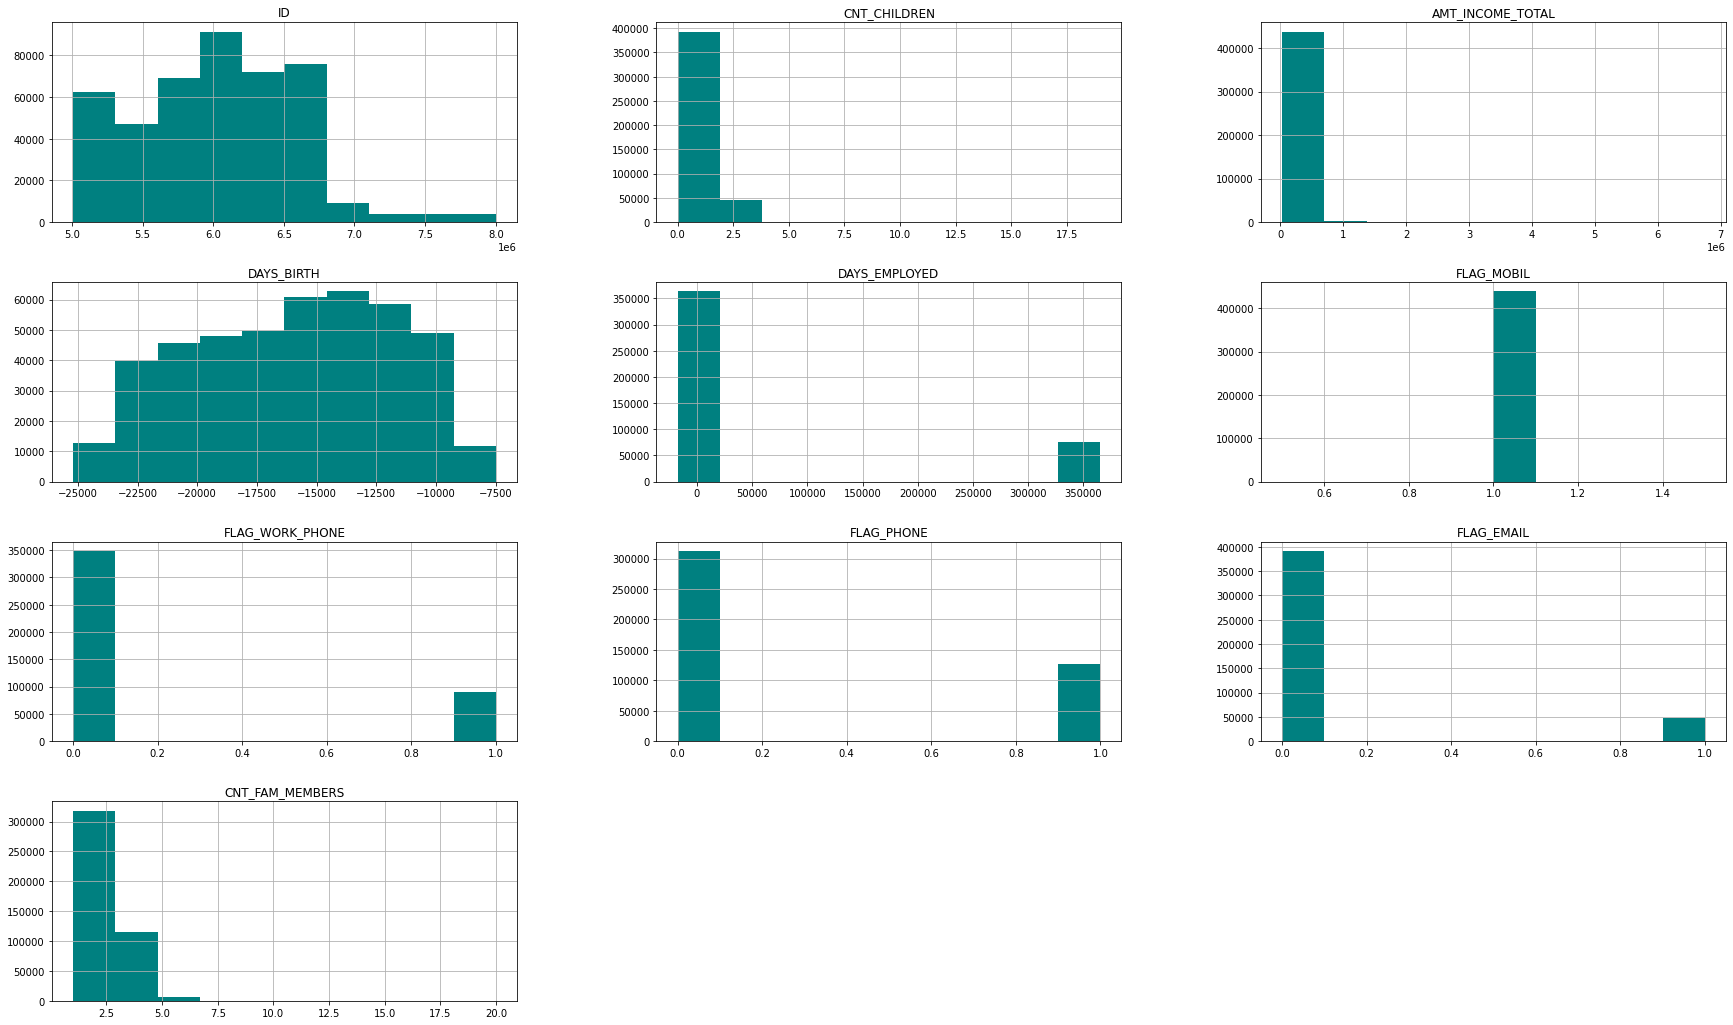

In [ ]:
application.hist(bins=10, figsize=(30,18), color = 'teal')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa483233be0>,
      dtype=object)

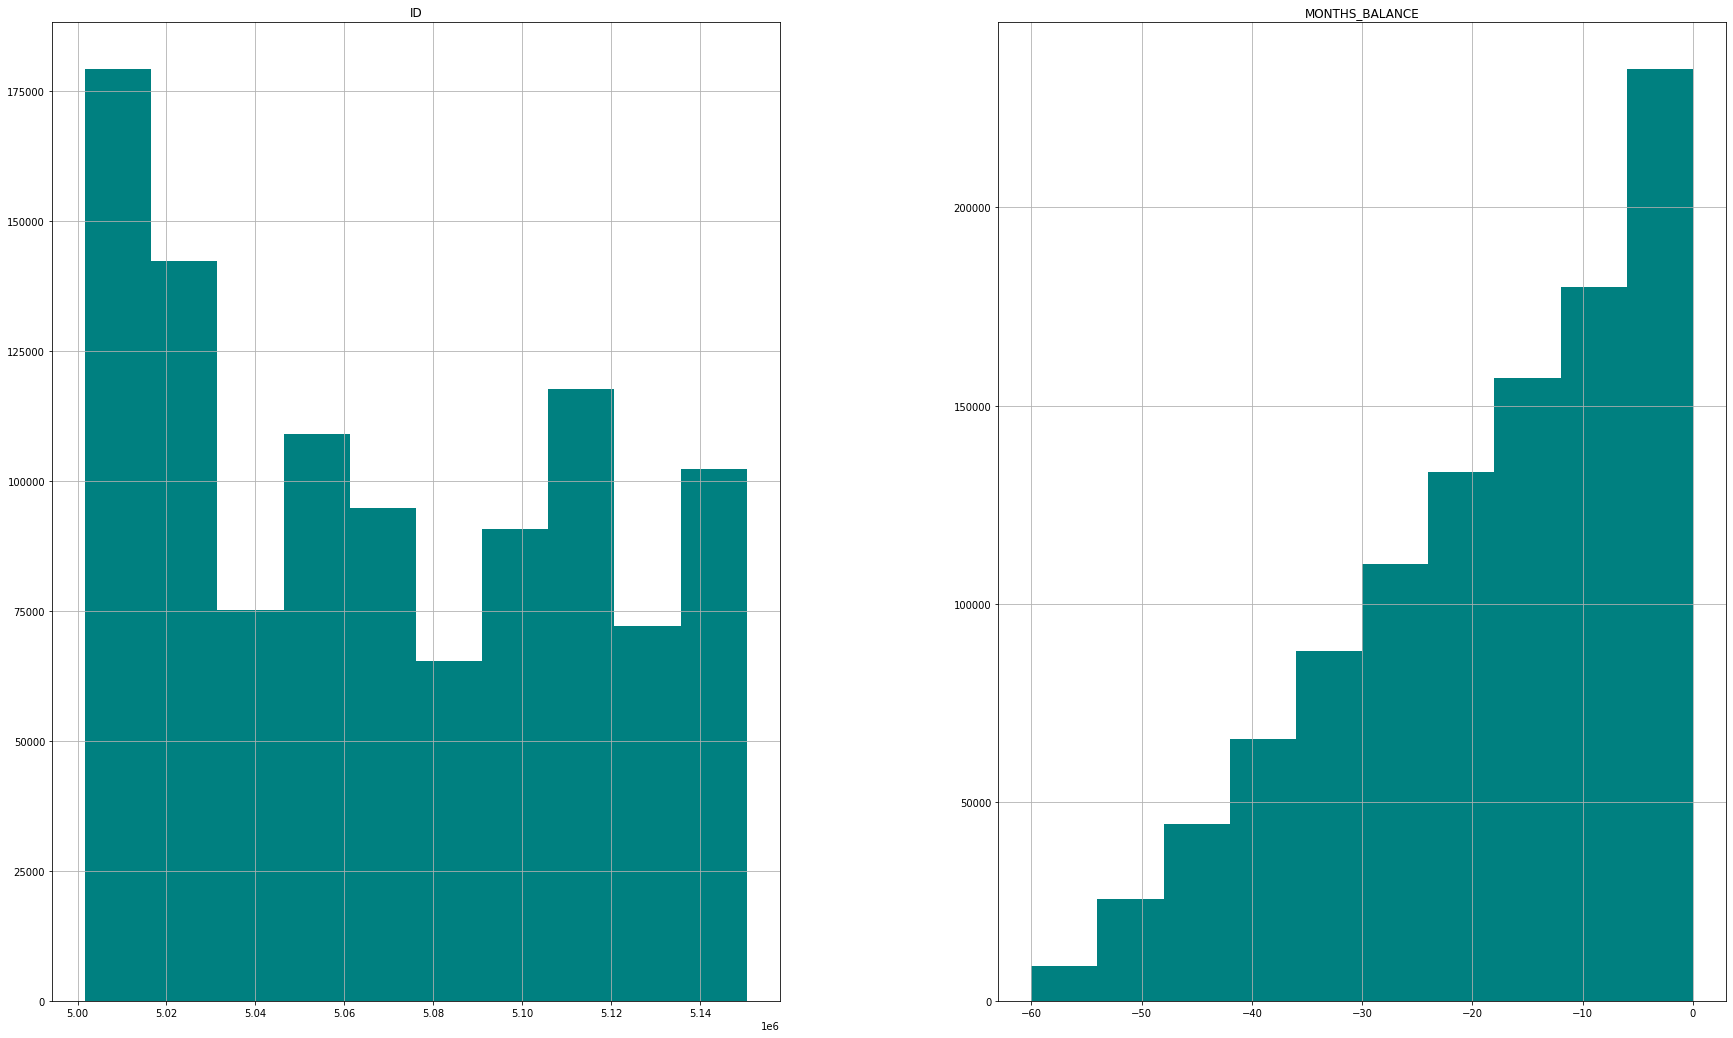

In [ ]:
credit.hist(bins=10, figsize=(30,18), color = 'teal')

In [ ]:
# Here we define the default situation as not paying for more than or equal to 2 months.
# Default rate = Number of accounts being in default / Total number of accounts
len(credit[(credit.STATUS=="2") | (credit.STATUS=="3") | (credit.STATUS=="4") | (credit.STATUS=="5")]) / len(credit)
                                                                                                             

0.0029602079011992466

## Missing values

In [ ]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# Preprocess the data
---

## Define the default situation and generate the new variable expressing this

In [ ]:
# Identify all of accounts all of users have
begin_month=pd.DataFrame(credit.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
new_data=pd.merge(application,begin_month,how="left",on="ID") # Let's merge this with dataset 1

In [ ]:
# Define the default situaion as not paying for more than or equal to 2 months and check whether each account is in this situation or not
credit['dep_value'] = None
credit['dep_value'][credit['STATUS'] =='2']='Yes' 
credit['dep_value'][credit['STATUS'] =='3']='Yes' 
credit['dep_value'][credit['STATUS'] =='4']='Yes' 
credit['dep_value'][credit['STATUS'] =='5']='Yes' 

In [ ]:
# Count the number of accounts being in default
credit["dep_value"].value_counts()

Yes    3104
Name: dep_value, dtype: int64

In [ ]:
# Assign the accounts to each client ID
cpunt=credit.groupby('ID').count()

In [ ]:
# The number of accounts being in default
cpunt["dep_value"].value_counts()

0     45318
1       274
2       108
3        68
4        38
5        25
6        25
8        20
11       12
9        12
7        11
12       11
13        7
10        7
15        6
20        6
14        5
19        3
35        3
48        3
17        3
16        2
22        2
18        2
27        2
47        1
39        1
40        1
38        1
43        1
21        1
45        1
23        1
24        1
33        1
26        1
31        1
Name: dep_value, dtype: int64

In [ ]:
# Add the default label to the client having accounts being in defalut 
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]

In [ ]:
# The number of clients in default situation
len(cpunt[cpunt.dep_value=="Yes"])

667

## Merge with dataset 1

In [ ]:
df=pd.merge(new_data,cpunt,how='inner',on='ID')

In [ ]:
df['target']=df['dep_value']
df = df.drop("dep_value", axis=1)

In [ ]:
df.loc[df['target']=='Yes','target']=1
df.loc[df['target']=='No','target']=0

In [ ]:
df["target"] = df["target"].astype(int)

In [ ]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
len(df[df.target>0])

616

## Missing values

In [ ]:
df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
begin_month                0
target                     0
dtype: int64

In [ ]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna('occupation_missing')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

## Chenge object values to numerical ones

##### categorical values

In [ ]:
df["CODE_GENDER"] = df["CODE_GENDER"].replace({"F":0, "M":1})

In [ ]:
df["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace({"N":0, "Y":1})

In [ ]:
df["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace({"N":0, "Y":1})

##### multi nominal categorical values 

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'begin_month', 'target', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apart

## Recheck the dist and corr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa48066f0f0>,
      dtype=object)

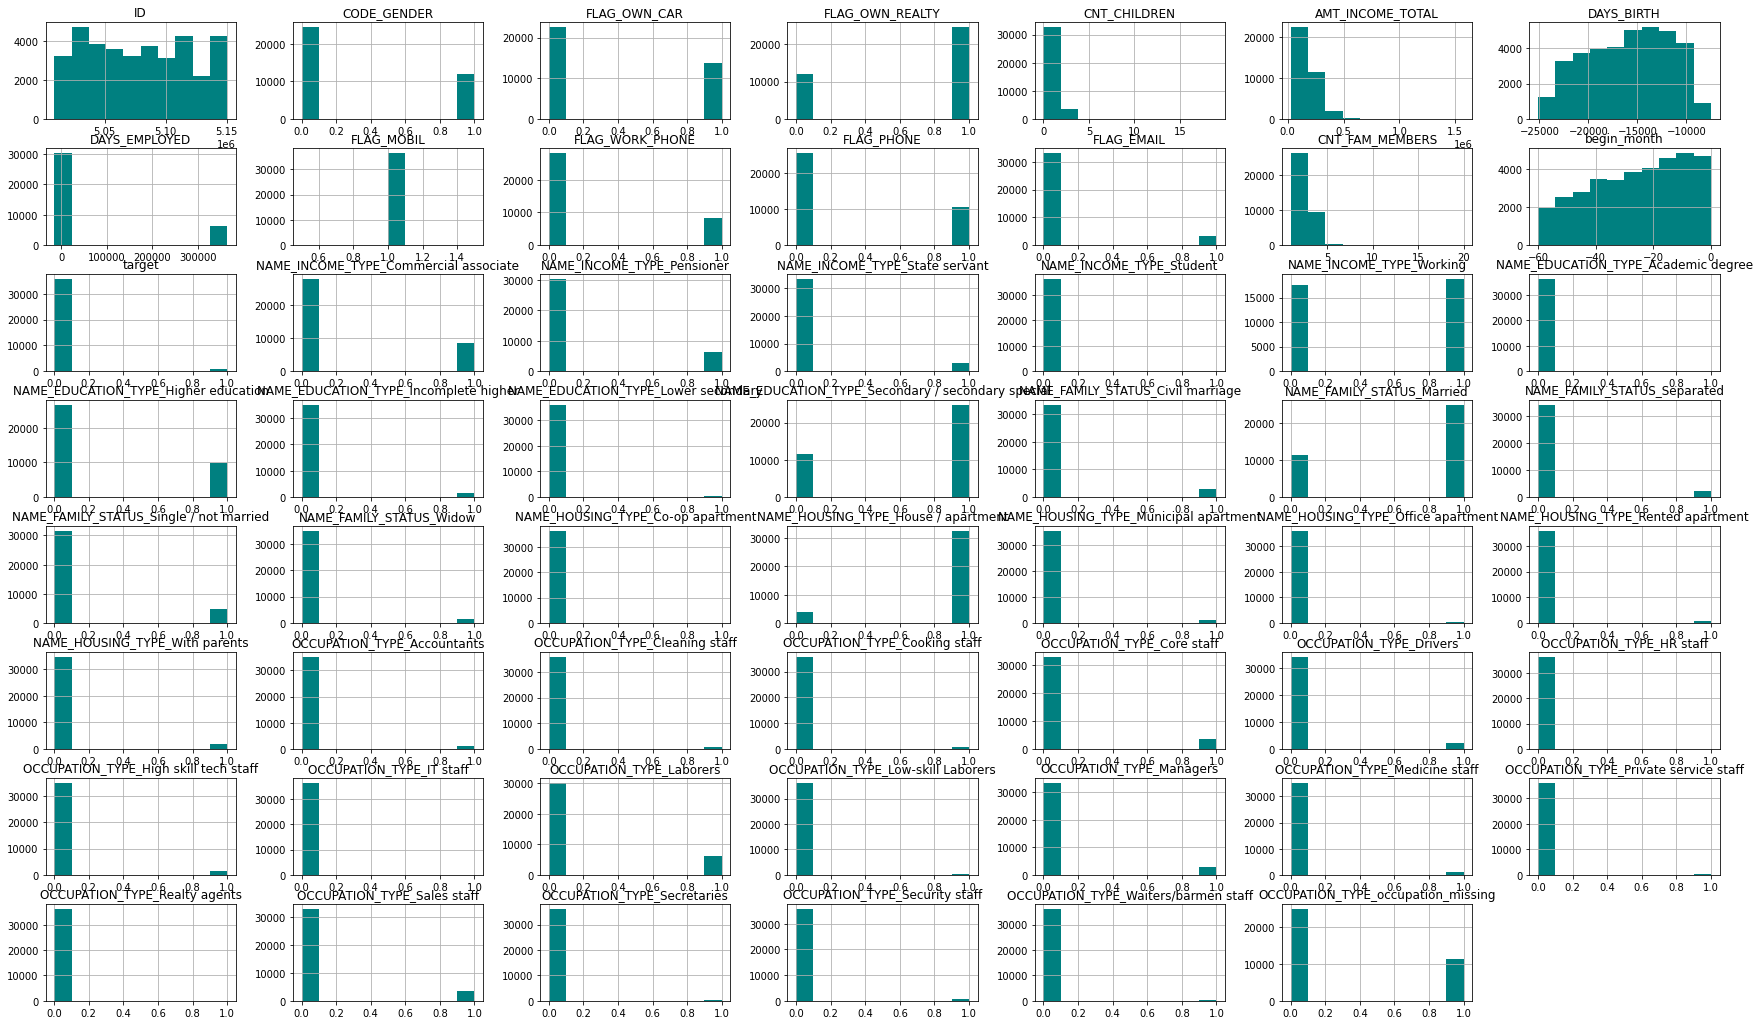

In [ ]:
df.hist(bins=10, figsize=(30,18), color = 'teal')

In [79]:
df.to_pickle(path+"/03_primary/mastertable_card_default.pickle")

# Classification models

In [80]:
df = pd.read_pickle(path+"/03_primary/mastertable_card_default.pickle")

## Split the data

`train_test_split()`

In [ ]:
y_target = df['target']

In [ ]:
X_explanatory = df.drop(["target", "ID"], axis=1)

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X_explanatory, y_target, stratify = y_target, random_state=1, test_size=0.2)

In [ ]:
len(X_train), len(X_test)

(29165, 7292)

In [ ]:
len(y_train),len(y_test)

(29165, 7292)

Check the distributions of train and test data are equal.

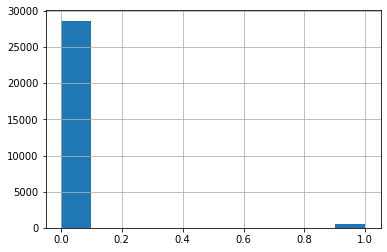

In [ ]:
y_train.hist()

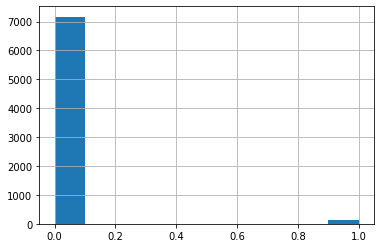

In [ ]:
y_test.hist()

The distributions are similar in train and test datasets. That is fine.

## Base models

### Random Forest
`RandomForestClassifier()`

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### XGB
`xgb.XGBClassifier()`

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Prediction
---

`.predict()`


### Random Forest

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

### XGB

In [ ]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

## Accuracy
---

### `classification_report()`

#### Random Forest

In [ ]:
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7169
           1       0.32      0.08      0.13       123

    accuracy                           0.98      7292
   macro avg       0.65      0.54      0.56      7292
weighted avg       0.97      0.98      0.98      7292



#### XGB

In [ ]:
xgb_report = classification_report(y_test, xgb_pred)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7169
           1       0.00      0.00      0.00       123

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.97      7292



### `confusion_matrix()`

#### Random Forest

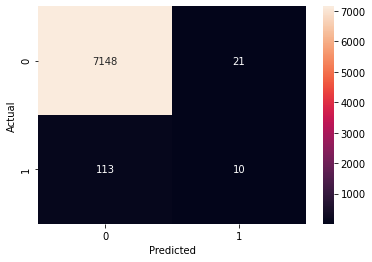

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
df_rf_cm = pd.DataFrame(rf_cm, columns=np.unique(y_test), index = np.unique(y_test))
df_rf_cm.index.name = 'Actual'
df_rf_cm.columns.name = 'Predicted'
sns.heatmap(df_rf_cm, annot=True, fmt='d')

#### XGB

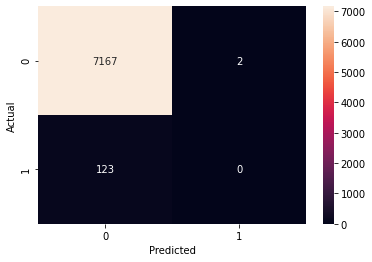

In [ ]:
xgb_cm = confusion_matrix(y_test, xgb_pred)
df_xgb_cm = pd.DataFrame(xgb_cm, columns=np.unique(y_test), index = np.unique(y_test))
df_xgb_cm.index.name = 'Actual'
df_xgb_cm.columns.name = 'Predicted'
sns.heatmap(df_xgb_cm, annot=True, fmt='d')

# Features Engineering
---

## Inbalance data

As we see, the imbalance of dependent variable causes the problem. First of all, the case of default is quite rare, so if the model predicts all clients will not be in default, the accuracy in itself may be still very high. This is the reason why the metrics "accuracy" is high but the other metrics above are not enough. Actually this model is not appropriate in terms of our objective: to predict the probability of each client being in default. This is because the model should say "He is risky!" for a person who has high possibility to be in default and "He is not risky!" for a person who does not have high possibility to be in default.

So I need to fix the imbalance data here. 

### Solutions to imbalance data

As a treatment method, it is effective to change the ratio of label 1 and label 0 in a dependent variable.<br>

Concletely, 
- Under Sampling：Decrease data points attached label 0
- Over Sampling：Increase data points attached label 1
- SMOTE: Do the both above procedures

These ways are effective to decrease False Negative.

## Implementation of SMOTE
SMOTE(Synthetic Minority Over-sampling Technique)

`SMOTE().fit_sample()`

In [ ]:
from imblearn.over_sampling import SMOTE
X_balance,y_balance = SMOTE().fit_sample(X_explanatory,y_target)
X_balance = pd.DataFrame(X_balance,columns=X_explanatory.columns)

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_balance, y_balance, 
                                                    stratify=y_balance, 
                                                    random_state = 1,
                                                    test_size=0.2,)

# Modeling, Prediction, Accuracy check
---

## Modeling

### Random Forest

In [ ]:
rf_bal_model = RandomForestClassifier()
rf_bal_model.fit(X_bal_train,y_bal_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### XGB

In [ ]:
xgb_bal_model = xgb.XGBClassifier()
xgb_bal_model.fit(X_bal_train,y_bal_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Prediction

### Random Forest

In [ ]:
rf_bal_pred = rf_bal_model.predict(X_bal_test)
rf_bal_pred

array([0, 0, 0, ..., 0, 0, 1])

### XGB

In [ ]:
xgb_bal_pred = xgb_bal_model.predict(X_bal_test)
xgb_bal_pred

array([0, 0, 0, ..., 0, 0, 1])

## Accuracy

### Random Forest

In [ ]:
rf_bal_report = classification_report(y_bal_test, rf_bal_pred)
print(rf_bal_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7168
           1       0.99      0.99      0.99      7169

    accuracy                           0.99     14337
   macro avg       0.99      0.99      0.99     14337
weighted avg       0.99      0.99      0.99     14337



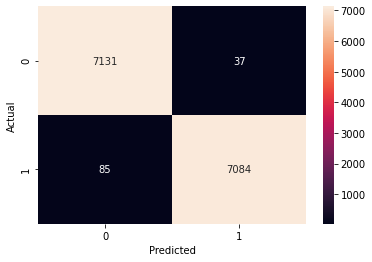

In [ ]:
rf_bal_cm = confusion_matrix(y_bal_test, rf_bal_pred)
df_rf_bal_cm = pd.DataFrame(rf_bal_cm, columns=np.unique(y_bal_test), index = np.unique(y_bal_test))
df_rf_bal_cm.index.name = 'Actual'
df_rf_bal_cm.columns.name = 'Predicted'
sns.heatmap(df_rf_bal_cm, annot=True, fmt='d')

### XGB

In [ ]:
xgb_bal_report = classification_report(y_bal_test, xgb_bal_pred)
print(xgb_bal_report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      7168
           1       0.99      0.84      0.91      7169

    accuracy                           0.92     14337
   macro avg       0.93      0.92      0.92     14337
weighted avg       0.93      0.92      0.92     14337



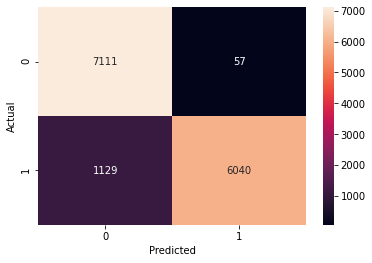

In [ ]:
xgb_bal_cm = confusion_matrix(y_bal_test, xgb_bal_pred)
df_xgb_bal_cm = pd.DataFrame(xgb_bal_cm, columns=np.unique(y_bal_test), index = np.unique(y_bal_test))
df_xgb_bal_cm.index.name = 'Actual'
df_xgb_bal_cm.columns.name = 'Predicted'
sns.heatmap(df_xgb_bal_cm, annot=True, fmt='d')

Random Forest is better in this case.
In terms of other metrics, the model seems to be improved enough! <br>
Let's move on storeing the model and params and interpretation.

# Store the models
---

`pickle.dump()`
```
with open('fileName.pkl', mode='wb') as f:
    pickle.dump(variable, f)
```


## Random Forest

In [ ]:
with open(path+'/06_models/rf_bal_model.pickle', mode='wb') as f:
    pickle.dump(rf_bal_model, f)

## XGB

In [ ]:
with open(path+'/06_models/xgb_bal_model.pkl', mode='wb') as f:
    pickle.dump(xgb_bal_model, f)

# Interpretation
---

## Features Importance

#### Random Forest

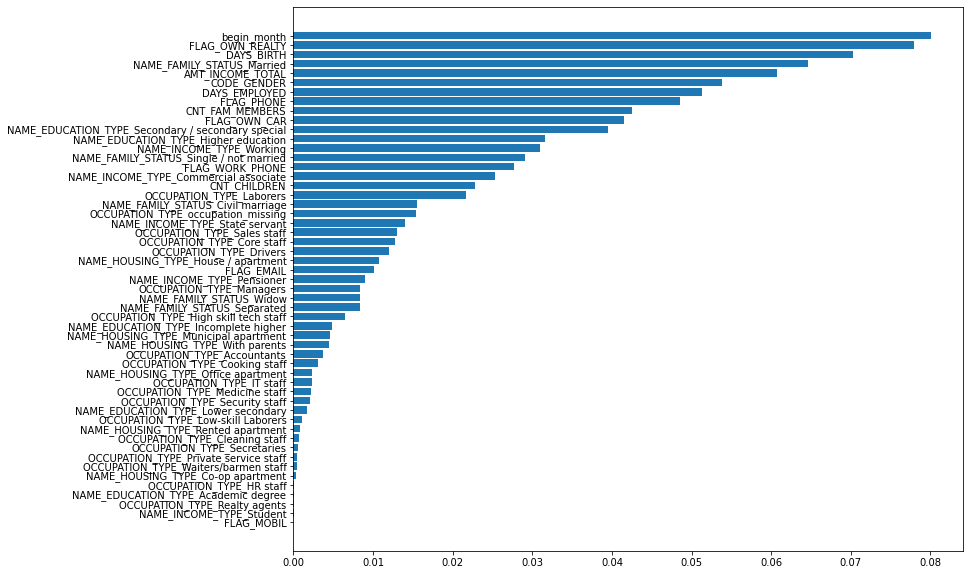

In [ ]:
features = X_bal_train.columns
importances = rf_bal_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)), importances[indices],  align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

Seemingly, 
- FLAG OWN REALTY
- begin_month
- DAYS BIRTH
- AMT_INCOME_TOTAL
- NAME_FAMILY_STATUS_MARRIED

are important variables for the prediction.

#### XGB

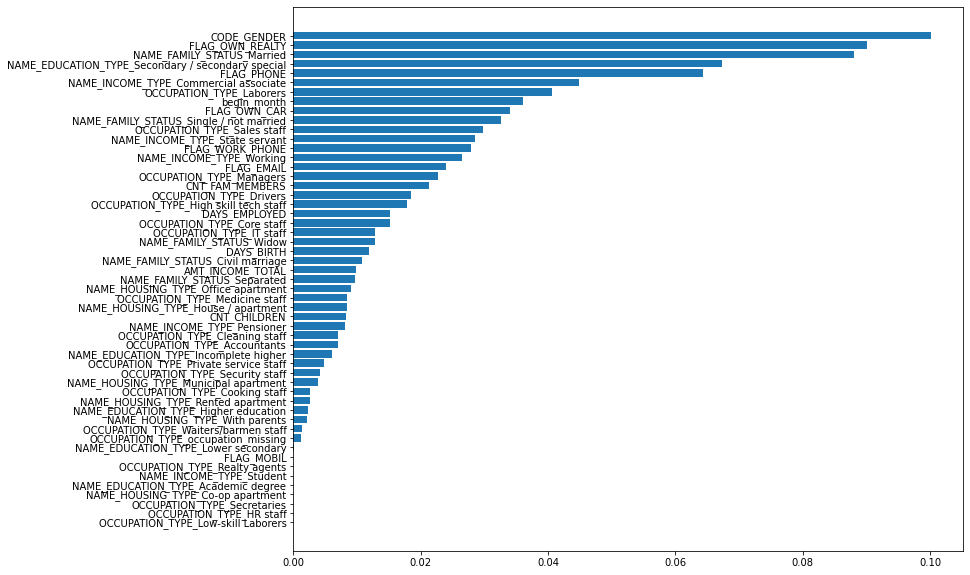

In [ ]:
features = X_bal_train.columns
importances = xgb_bal_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)), importances[indices],  align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

Seemingly, 
- CODE GENER
- NAME_FAMILY_STATUS_MARRIED
- FLAG_OWN_REALTY
- FLAG_PHONE
- NAME_EDUCATION_TYPE_Secondary / secondary special

have strong effects.

## Future work

As to the models, we need to consider the below points.
- Whether the threshold 0.5 is appropriate when assigning 1 or 0 to the evaluation or not.
- The fact that features importance does not give us information about the direction of effects; We do not know a varible has a positive effect or negative effect on the result.
- The fact that the correlation here necessarily does not mean the causal relationship.


## What we need to consider next

To put Data Science methods into practice, 
- Need to explain the results crearly and effectively
- Need to think about how to collect vital data and how to operate them in daily work flows 